In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from collections import Counter
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import numpy as np

# **Data Preprocessing**

In [4]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx'
df = pd.read_excel(url)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df.shape

(541909, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [8]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [9]:
df = df.dropna(subset=['Description'])
df_customer = df.dropna(subset=['CustomerID'])

In [10]:
df_customer = df_customer[(df_customer['Quantity']>0) & (df_customer['UnitPrice']>0)]

In [11]:
df_customer['InvoiceNo'] = df_customer['InvoiceNo'].astype(str)
df_customer = df_customer[~df_customer['InvoiceNo'].str.contains('C', na=False)]

In [12]:
df.isnull().sum()
df.shape

(540455, 8)

# **Feature Extraction**

In [13]:
basket = (df_customer.groupby(['InvoiceNo','Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo'))
basket_binary = basket.applymap(lambda x:1 if x>0 else 0)
basket_binary.head()

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Rows:** Each row corresponds to an invoice, identified by InvoiceNo.

**Columns:** Each column corresponds to a unique product description.

**Values:** The value in each cell is the quantity of the corresponding product in the corresponding invoice. If a product wasn't purchased in a particular invoice, the value is 0.


# **Visualization**

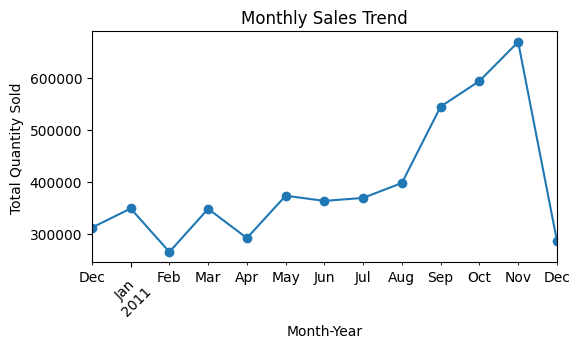

In [14]:
# Convert InvoiceDate to datetime if it's not already
df_customer['InvoiceDate'] = pd.to_datetime(df_customer['InvoiceDate'])

# Extract month and year for analysis
df_customer['MonthYear'] = df_customer['InvoiceDate'].dt.to_period('M')

# Sum of purchases per month
monthly_sales = df_customer.groupby('MonthYear')['Quantity'].sum()

# Plot the monthly sales
plt.figure(figsize=(6,3))
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month-Year')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.show()


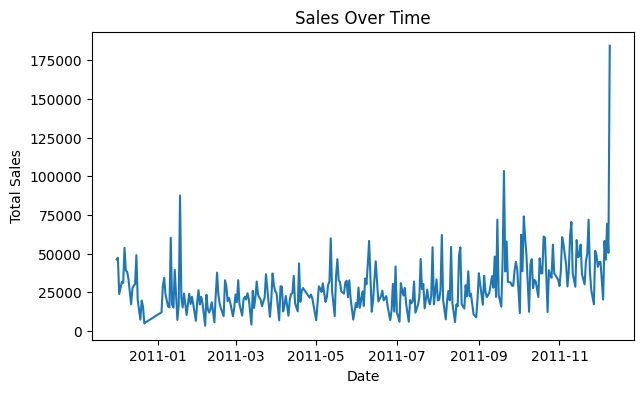

In [15]:
# Convert InvoiceDate to datetime format
df_customer['InvoiceDate'] = pd.to_datetime(df_customer['InvoiceDate'])

# Sales over time
df_customer['TotalSum'] = df_customer['Quantity'] * df_customer['UnitPrice']
sales_over_time = df_customer.groupby(df_customer['InvoiceDate'].dt.date)['TotalSum'].sum()
plt.figure(figsize=(7, 4))
sales_over_time.plot()
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()


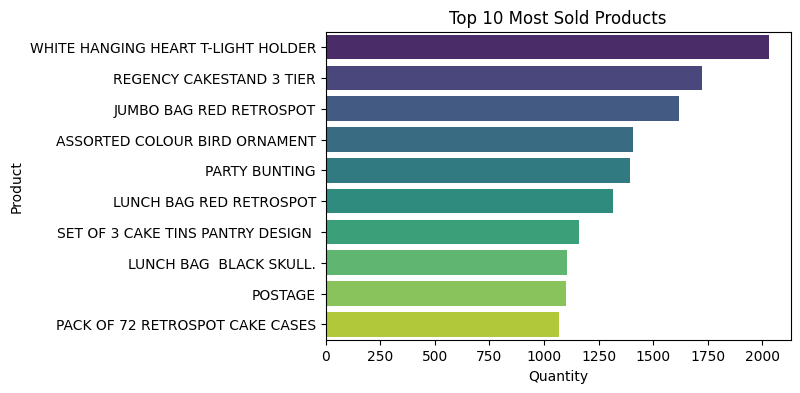

In [16]:
#Top 10 Most Sold Products
top_products = df_customer['Description'].value_counts().head(10)
plt.figure(figsize=(6,4))
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.ylabel('Product')
plt.xlabel('Quantity')
plt.title('Top 10 Most Sold Products')
plt.show()

Text(0.5, 1.0, 'Top 10 Most Profitable Products')

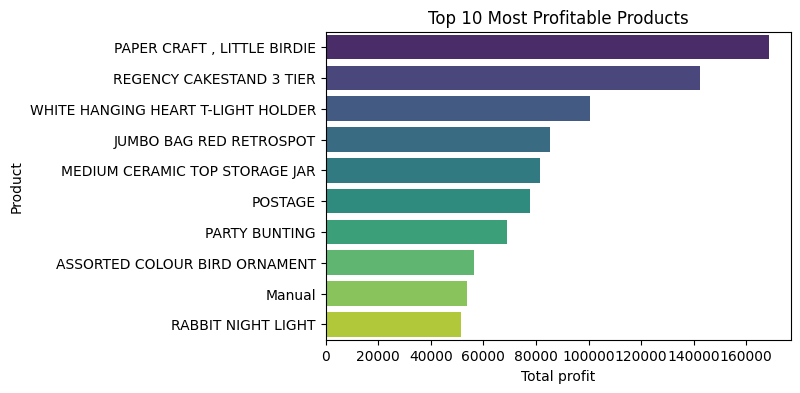

In [17]:
#Top 10 Most Profitable Products
top_profitable_products = df_customer.groupby('Description')['TotalSum'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(6,4))
sns.barplot(x=top_profitable_products.values, y=top_profitable_products.index, palette='viridis')
plt.ylabel('Product')
plt.xlabel('Total profit')
plt.title('Top 10 Most Profitable Products')

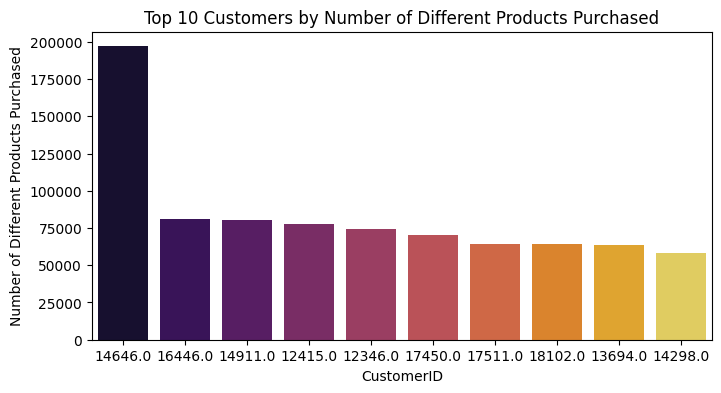

In [18]:
# Plot the top customers by the variety of products purchased
customer_basket = df_customer.groupby(['CustomerID', 'Description'])['Quantity'].sum().unstack().fillna(0)
top_customers = customer_basket.sum(axis=1).sort_values(ascending=False).head(10)

plt.figure(figsize=(8,4))
sns.barplot(x=top_customers.index.astype(str), y=top_customers.values, palette='inferno')
plt.title('Top 10 Customers by Number of Different Products Purchased')
plt.xlabel('CustomerID')
plt.ylabel('Number of Different Products Purchased')
plt.show()

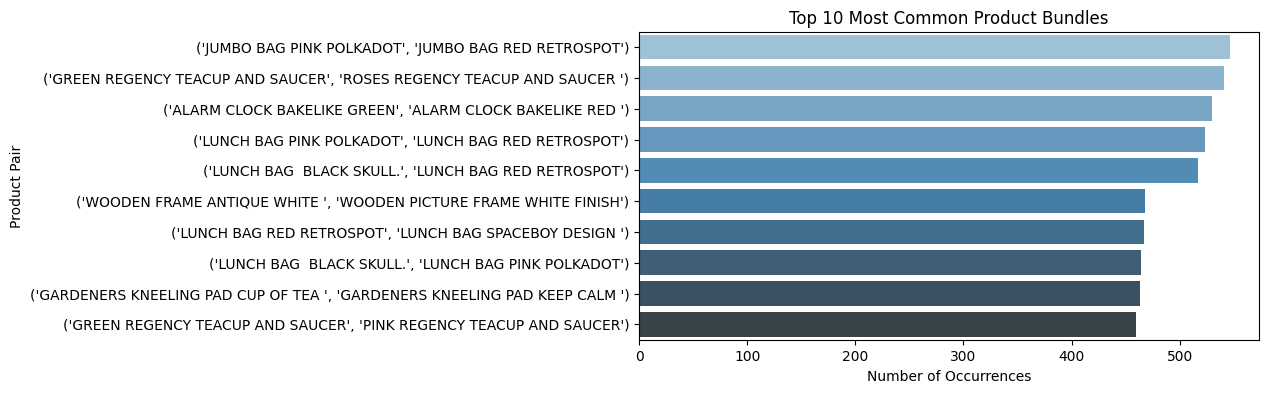

In [19]:
#Top 10 Most Common Product Bundles

#Generate pairs of products that appear in the same invoice
product_pairs = []

for invoice in basket_binary.index:
    products = basket_binary.loc[invoice]
    purchased_products = products[products > 0].index.tolist()
    product_pairs.extend(list(combinations(purchased_products, 2)))

# Count the most common pairs
product_pair_counts = Counter(product_pairs)
common_product_pairs = product_pair_counts.most_common(10)

# Convert to DataFrame for easier plotting
common_product_pairs_df = pd.DataFrame(common_product_pairs, columns=['Product Pair', 'Count'])

# Convert the 'Product Pair' column to a string representation
common_product_pairs_df['Product Pair'] = common_product_pairs_df['Product Pair'].astype(str)

# Plot the top 10 product pairs
plt.figure(figsize=(8,4))
sns.barplot(x='Count', y='Product Pair', data=common_product_pairs_df, palette='Blues_d')
plt.title('Top 10 Most Common Product Bundles')
plt.xlabel('Number of Occurrences')
plt.ylabel('Product Pair')
plt.show()


# **Determining Optimal Number of Clusters**

In [20]:
# Applying PCA(Principal Component Analysis) for Dimensionality Reduction
pca = PCA(n_components=2)
pca_result = pca.fit_transform(basket_binary)

**Elbow Method**

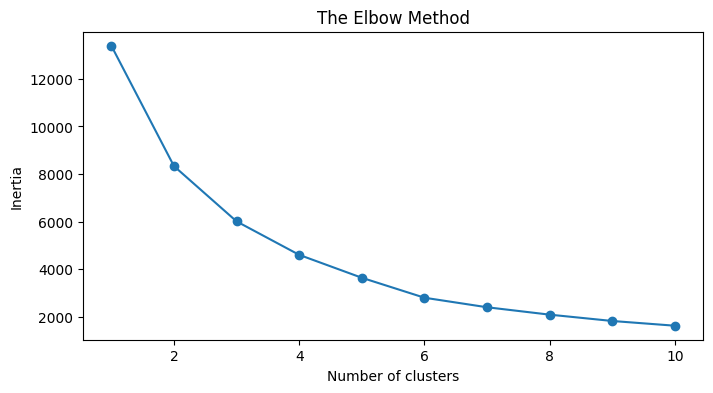

In [21]:
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_result)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,4))
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('The Elbow Method')
plt.show()

**Silhouette Score**

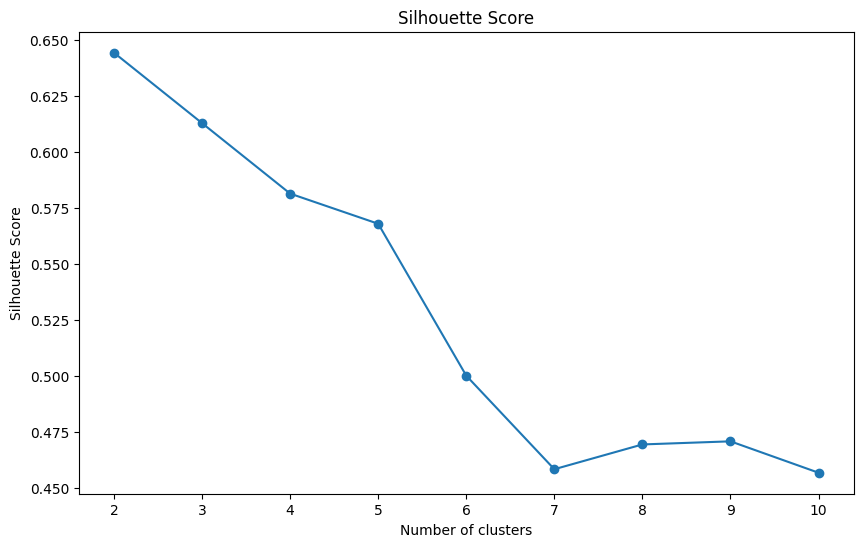

In [22]:
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(pca_result)
    silhouette_avg = silhouette_score(pca_result, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(10,6))
plt.plot(K, silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.show()

**Combining insights from both the Elbow Method and the Silhouette Score: *3* clusters might be the best choice**

# **Model Building**

**K-means** **Clustering**

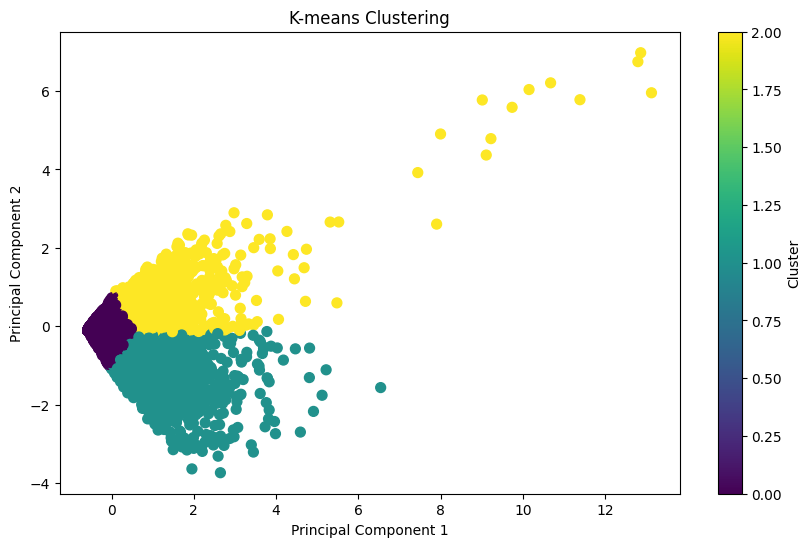

In [23]:
#Applying K-means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_kmeans = kmeans.fit_predict(pca_result)

basket['Cluster_Kmeans'] = cluster_kmeans

plt.figure(figsize=(10,6))
plt.scatter(pca_result[:,0], pca_result[:,1], c=cluster_kmeans, cmap='viridis', s=50)
plt.title('K-means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

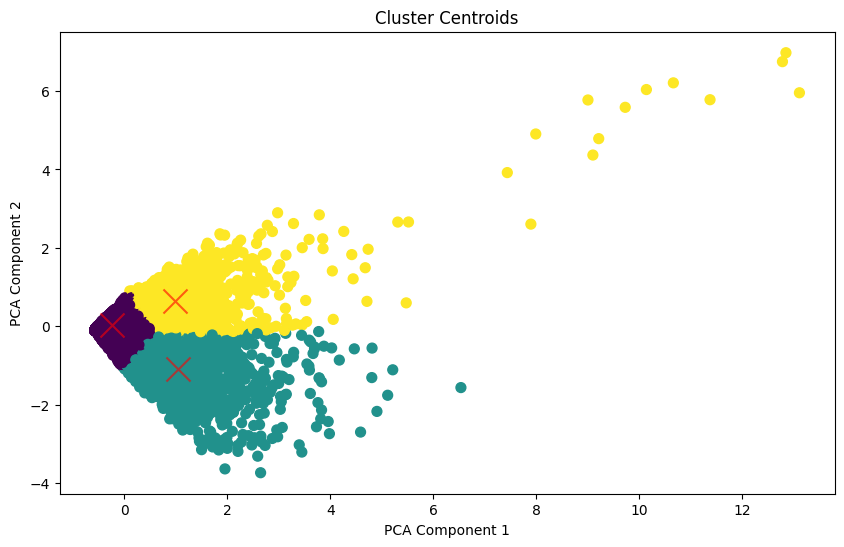

In [24]:
# Find the centroid of each cluster
centroids = kmeans.cluster_centers_

# Visualize centroids
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=cluster_kmeans, cmap='viridis', s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=300, alpha=0.6, marker='x')
plt.title('Cluster Centroids')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


In [25]:
# Display the clusters with product descriptions for K-means
cluster_summary_kmeans = basket.groupby('Cluster_Kmeans').mean()
print("K-means Clustering Results:")
print(cluster_summary_kmeans.head(10))


K-means Clustering Results:
Description      4 PURPLE FLOCK DINNER CANDLES  \
Cluster_Kmeans                                   
0                                     0.008408   
1                                     0.001826   
2                                     0.005935   

Description      50'S CHRISTMAS GIFT BAG LARGE   DOLLY GIRL BEAKER  \
Cluster_Kmeans                                                       
0                                     0.082734            0.061815   
1                                     0.056604            0.374924   
2                                     0.277943            0.426805   

Description      I LOVE LONDON MINI BACKPACK   I LOVE LONDON MINI RUCKSACK  \
Cluster_Kmeans                                                               
0                                   0.009820                      0.000067   
1                                   0.045648                      0.000000   
2                                   0.068744              

In [ ]:
# prompt: merge basket and df_customer

# Assuming 'CustomerID' is the common column between the two dataframes
merged_df = pd.merge(basket, df_customer, left_index=True, right_on='InvoiceNo')
merged_df.head()

In [ ]:
# Visualize the distribution of quantities across clusters
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster_Kmeans', y='Quantity', data=basket)
plt.title('Quantity Distribution Across Clusters')
plt.show()

# Visualize the distribution of unit prices across clusters
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster_Kmeans', y='UnitPrice', data=basket)
plt.title('Unit Price Distribution Across Clusters')
plt.show()


**Agglomerative Clustering**

In [ ]:
agglo = AgglomerativeClustering(n_clusters=3)
cluster_agglo = agglo.fit_predict(pca_result)

basket['Cluster_Agglo'] = cluster_agglo

plt.figure(figsize=(10,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=cluster_agglo, cmap='plasma', s=50)
plt.title('Agglomerative Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
# Display the clusters with product descriptions for Agglomerative Clustering
cluster_summary_agglo = basket.groupby('Cluster_Agglo').mean()
print("\nAgglomerative Clustering Results:")
print(cluster_summary_agglo.head(10))

In [ ]:
# Visualize the distribution of unit prices across clusters
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster_kmeans', y='UnitPrice', data=df_customer)
plt.title('Unit Price Distribution Across Clusters')
plt.show()

# **Final Insights from Cluster Analysis**